# Land Use Processing

In [4]:
import geopandas as gpd

blocks = gpd.read_parquet('./data/blocks.parquet')
pzz_2019 = gpd.read_parquet('./data/PZZ_2019.parquet').to_crs(blocks.crs).rename(columns={'functional_zone_type_name': 'zone'})
pzz_2023 = gpd.read_parquet('./data/PZZ_2023.parquet').to_crs(blocks.crs).rename(columns={'functional_zone_type_name': 'zone'})

In [5]:
from lu_igi.land_use import LandUse

land_use_mapping = {
    'residential' : LandUse.RESIDENTIAL,
    'recreation' : LandUse.RECREATION,
    'special' : LandUse.SPECIAL,
    'industrial' : LandUse.INDUSTRIAL,
    'agriculture' : LandUse.AGRICULTURE,
    'transport' : LandUse.TRANSPORT,
    'business' : LandUse.BUSINESS,
    'residential_individual' : LandUse.RESIDENTIAL,
    'residential_lowrise' : LandUse.RESIDENTIAL,
    'residential_midrise' : LandUse.RESIDENTIAL,
    'residential_multistorey' : LandUse.RESIDENTIAL,
}

In [6]:
from lu_igi.land_use.processing import process_land_use

## PZZ 2019

In [7]:
blocks_with_lu = process_land_use(blocks, pzz_2019, land_use_mapping, min_intersection_share=0.3)
blocks_with_lu.to_pickle('./data/blocks_2019.pickle')

2025-02-08 03:15:10.449 | INFO     | lu_igi.land_use.processing:_validate_input:22 - Validating input
2025-02-08 03:15:10.488 | INFO     | lu_igi.land_use.processing:_process_zones:29 - Processing functional zones
2025-02-08 03:15:10.491 | INFO     | lu_igi.land_use.processing:process_land_use:38 - Intersecting geometries
2025-02-08 03:15:12.086 | INFO     | lu_igi.land_use.processing:process_land_use:58 - Calculating shares
2025-02-08 03:15:23.998 | SUCCESS  | lu_igi.land_use.processing:process_land_use:62 - Shares calculated


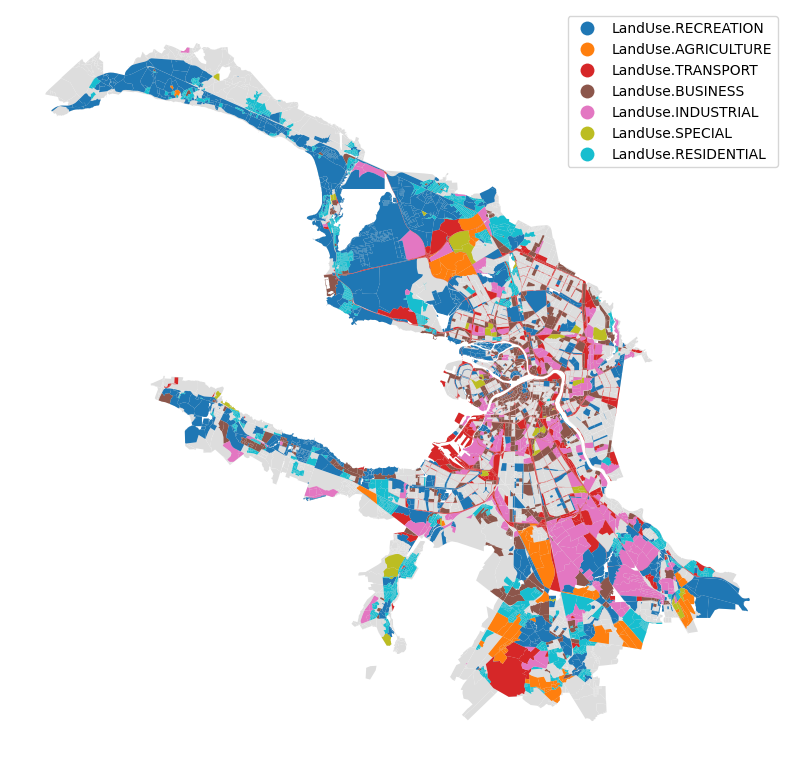

In [8]:
ax = blocks_with_lu.plot(color='#ddd', figsize=(10,10))
blocks_with_lu.plot(ax=ax, column='land_use', legend=True)
ax.set_axis_off()

## PZZ 2023

In [9]:
blocks_with_lu = process_land_use(blocks, pzz_2023, land_use_mapping, min_intersection_share=0.3)
blocks_with_lu.to_pickle('./data/blocks_2023.pickle')

2025-02-08 03:15:28.294 | INFO     | lu_igi.land_use.processing:_validate_input:22 - Validating input
2025-02-08 03:15:28.317 | INFO     | lu_igi.land_use.processing:_process_zones:29 - Processing functional zones
2025-02-08 03:15:28.320 | INFO     | lu_igi.land_use.processing:process_land_use:38 - Intersecting geometries
2025-02-08 03:15:29.931 | INFO     | lu_igi.land_use.processing:process_land_use:58 - Calculating shares
2025-02-08 03:15:41.700 | SUCCESS  | lu_igi.land_use.processing:process_land_use:62 - Shares calculated


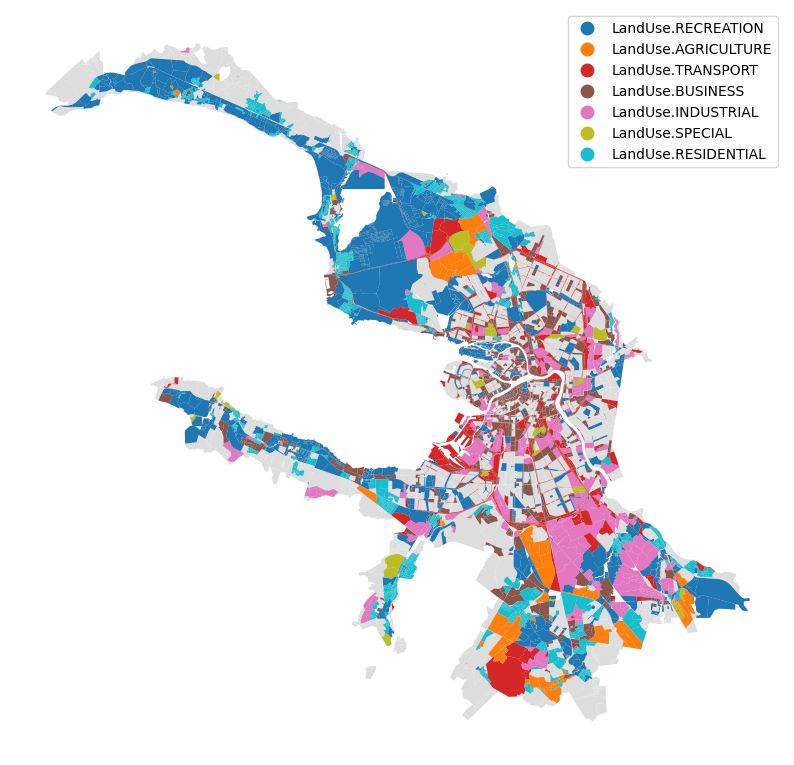

In [10]:
ax = blocks_with_lu.plot(color='#ddd', figsize=(10,10))
blocks_with_lu.plot(ax=ax, column='land_use', legend=True)
ax.set_axis_off()